## 2.사이킷런으로 시작하는 머신러닝

## 01 scikit-learn 소개와 특징
쉽고 가장 파이썬스러운 API제공  
머신러닝을 위한 다양한 알고리즘, 개발을 위한 편리한 프레임워크, API제공  
오랜 기간 실전 환경에서 검증됨, 매우 많은 환경에서 사용되는 성숙한 라이브러리

In [ ]:
import sklearn
print(sklearn.__version__)

0.19.1


----------------

## 02 붓꽃 품종 예측하기 - 분류

 Sepal length(꽃잎길이), Sepal width(꽃잎 너비), Petal length(꽃받침길이), Petal width(꽃받침 너비) 기반 꽃 품종 예측

### 지도학습(Supervised Learning) - 답이 주어진 데이터를 먼저 한습 한 뒤 미지의 정답 예측, 레이블이 지정된 데이터 즉, 분류된 데이터를 사용
### -일반유형1.분류(Classification)
##### 로지스틱 회귀
##### 선형 판별 분석
##### K-최근접 이웃(KNN, K-nearest neighbors)
##### 트리(Trees)
##### 신경망
##### 서포트 벡터 머신(SVM, Support vector machines)

### - 일반유형2. 선형회귀(linearRegression)

In [ ]:
from sklearn.datasets import load_iris #사이킷런에서 자체 제공하는 데이터 세트 생성하는 모듈 모임
from sklearn.tree import DecisionTreeClassifier #트리기반 ML 알고리즘 구현 클래스모임
from sklearn.model_selection import train_test_split #학습데이터, 검증데이터, 예측데이터 분리, 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈 모임


데이터 프레임 생성

In [ ]:
import pandas as pd

iris = load_iris()
iris_data = iris.data #->feature만으로 된 데이터 numpy

iris_label = iris.target #->레이블(결정값)데이터 numpy
print('iris target값:',iris_label)
print('iris target명:', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

하이퍼파라미터: 머신러닝 알고리즘별 최적의 학습을 위해 직접 입력하는 파라미터, 머신러닝 알고리즘의 성능 튜닝가능  
train_test_split의 파라미터순서: 피처데이터세트, 레이블데이터세트, 테스트세트비율, 호출시마다 동일 데이터셋 분리하기 위해 숫자 부여, 변경가능

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state=11)

In [ ]:
#DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [ ]:
#학습 완료된 dt_clf에서 테스트데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [ ]:
#정확도 평가: 예측결과가 실제 레이블값과 얼마나 정확하게 맞는지 평가
#accury_score의 파라미터 순서: 1.실제레이블 데이터세트, 2.예측레이블 데이터세트

from sklearn.metrics import accuracy_score
print('예측정확도: {0: .4f}'.format(accuracy_score(y_test,pred)))

예측정확도:  0.9333


### 예측프로세스: 1.데이터 세트 분리, 2.모델 학습, 3.예측 수행, 4.평가

********************

## 03 사이킷런의 기반 프레임워크 익히기

### 사이킷런 주요 모듈   
1.예제 데이터   
 - sklearn.datasets 예제로 제공하는 데이터 세트  
 
2.피처처리  
 - sklearn.preprocessing 데이터 전처리에 필요한 가공기능 제공(문자열 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)  
 - sklearn.feature_selection 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업 수행하는 다양한 기능 제공   
 - sklearn.feature_extraction 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용, sklearn.feature_extraction.text(텍스트데이터 피처 추출, sklearn.feature_extraction.image(이미지데이터 피처 추출)    

3.피처처리&차원축소  
 - sklearn.decomposition PCA(주성분분석), NMF(비음수 행렬 분해, 음수가 포함되지 않은 성분,계수값을 찾음), Truncated SVD(Singular Value Decomposition, 특이값 분해) 등을 통해 차원축소 기능 수행   

4.데이터 분리, 검증&파라미터 튜닝  
 - sklearn.model_selection 교차검증을 위한 학습용/테스트용 분리, 그리드 서치(Grid Search)로 최적 파라미터 추출    
 
5.평가  
 - sklearn.metrics 분류, 회귀, 클러스터링, 페어와이즈(Pairwise)에 대한 다양한 성능 측정 방법 제공  
 Accuracy(정확도), Precision(정밀도), Recall/Sensitivity(재현율/민감도), ROC-AUC, RMSE(평균 제곱근 오차(Root Mean Square Error) 등 제공 
 ![confusion_matrix](confusion matrix.png)
 ![accuracy](accuracy.png)
 ![precision](precision.png)
 ![recall](recall.png)
 ![ROC-AUC](ROC-AUC.png)

6.ML 알고리즘 
 - sklearn.ensemble 앙상블 알고리즘 제공(랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등 /XGBoost제공하지 않음,따로 설치)  
 - sklearn.linear_model 선형 회귀, 릿지(Ridge), 라소(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘 지원, SGD(Stochastic Gradient Descent)관련 알고리즘도 제공  
 - sklearn.naive_bayes 나이브 베이즈 알고리즘 제공(가우시안 NB, 다항 분포 NB등)  
 - sklearn.neighbors 최근접 이웃 알고리즘 제공 k-nn 등  
 - sklearn.svm 서포트 벡터머신 알고리즘 제공  
 - sklearn.tree 의사 결정 트리 알고리즘 제공  
 - sklearn.cluster 비지도 클러스터링 알고리즘 제공(k-평균, 계층형, DBSCAN 등)  
 
 7.유틸리티 
 - sklearn.pipeline 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 할께 묶어서 실행할 수 있는 유틸리티 제공

#### 머신러닝 모델 구축 주요프로세스
#### - 피처 처리(가공, 변경, 추출) -> ML 알고리즘 학습/예측 수행 -> 모델평가의 반복 수행

### 내장된 예제 데이터 세트

### 분류나 회귀 연습용 예제 데이터
- datasets.load_boston() 회귀용도, 미국 보스턴 집 피처들과 가격에 대한 데이터 세트  
- datasets.load_diabetes() 회귀용도, 당뇨 데이터 세트  
- datasets.load_breast_cancer() 분류용도, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트  
- datasets.load_digits() 분류용도, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트  
- datasets.load_iris() 분류용도, 붓꽃 데이터 세트

### 분류와 클러스터링을 위한 표본 데이터 생성기
- datasets.make_classifications() 분류를 위한 데이터 세트 생성, 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터 무작위 생성  
- datasets.make_blobs() 클러스터링을 위한 데이터 세트 무작위 생성, 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트 쉽게 생성

사이킷런 내장 데이터 세트는 일반적으로 딕셔너리 형태, 키는 data, target, target_name, feature_names, DESC로 구성  
- data: 피처의 데이터세트  
- target: 분류시에는 레이블 값, 회귀일때는 숫자 결과값 데이터 세트  
- target_names: 개별 레이블 이름(ex.)setosa, versicolor, virginica)  
- feature_names: 피처의 이름  
- DESC: 데이터 세트에 대한 설명, 피처의 설명

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [ ]:
#Bunch 클래스는 파이썬 딕셔너리 자료형과 유사
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [ ]:
print('\n feature_names의 type:', type(iris_data.feature_names))
print(' feature_names의 shape:', len(iris_data.feature_names)) #리스트 타입이므로 길이(갯수) 구할때 len
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print(' data의 shape:', iris_data.data.shape) # len(iris_data.data)해도 됨
print(iris_data['data']) #iris_data.data 해도 됨

print('\n target의 type:', type(iris_data.target))
print(' target의 shape:', iris_data.target.shape)
print(iris_data.target)

-------------

## 04 Model Selection 모듈 소개

학습 데이터와 테스트 데이터 세트 분리 / 교차 검증 분할 및 평가 / Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수,클래스 제공 

### 학습/테스트 데이터 세트 분리 - train_test_split()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clsf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clsf.fit(train_data, train_label)
# 학습 데이터 세트로 예측 수행
pred = dt_clsf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


예측 수행 데이터 세트는 학습 수행 데이터 세트 아닌 전용의 테스터 데이터 세트가 있어야함  
사이킷런의 train_test_split()을 통해 테스트 데이터 세트를 쉽게 분리

train_test_split의 파라미터  
- test_size: 디폴트 0.25, 전체 데이터의 25%를 테스트 데이터로 분리  
- train_size: test_size를 통상적으로 사용하여 사용되지 않음  
- shuffle: 디폴트 True, 데이터 분리 전 데이터를 미리 섞을지 결정
- random_state: train_test_split()는 호출시 무작위로 데이터를 분리하므로 지정하지 않으면 수행할때 마다 다른 학습/테스트 데이터 생성, 동일 데이터 세트로 분리하기 위해 일정 숫자값 부여

In [ ]:
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [ ]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9556


### 교차검증

과적합(Overfitting)에 취약한 약점 - 모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어짐  
이러한 문제점 개선을 위해 교차 검증을 이용해 다양한 학습과 평가 수행   
학습 데이터세트를 다시 학습 데이터세트/검증 데이터세트로 분리하여 학습/평가

K개의 데이터 폴드 세트를 만들어서 K번만큼 각 세트에 학습과 검증 평가 반복적으로 수행  
K개의 예측 평가가 구해지면 이를 평균해서 K폴드의 평가 결과로 반영
![4-Fold](4-Fold.png)

#### 교차 검증 1 - K폴드 교차 검증

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold # 기존엔 train_test_split
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#5개 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits =5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0]) #0: 행의 갯수만 보기 위해

붓꽃 데이터 세트 크기: 150


150개의 4/5인 120개, 1/5인 30개로 분할

In [ ]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 

#### 교차 검증 2 - Stratified K폴드

불균형한 분포도를 가진 레이블 데이터 집합을 위해 원본 데이터의 레이블 분포를 고려하여 이 분포와 동일하게 학습/검증 데이터 세트를 분배함

In [ ]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

In [ ]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']): #split()메서드 인자로 **레이블 데이터 세트** 반드시 필요
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

In [ ]:
# 붓꽃 데이터 StatifiedKFold 
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy,4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 

#### 일반적으로 분류에서의 교차 검증은 K폴드가 아니라 StratifiedKFold로 분할되야 함  
#### 회귀에서는 StratifiedKFold가 지원되지 않음, 결정값이 연속된 숫자값이기 때문에 결정값 별로 분포 정하는 의미가 없기 때문에

#### 교차 검증을 간단하게 - **cross_val_score()**

선언형태: cross_val_score(**estimator, X, y=None, scring=None, cv=None**, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs') 
- estimator는 사이킷런 분류 알고리즘 클래스인 Classifier 또는 Regressor를 의미  
- X는 피처 데이터 세트  
- y 레이블 데이터 세트  
- scoring 예측 성능 평가 지수 기술 (ex.Accuracy)  
- cv 교차검증 폴드 수

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [ 0.9804  0.9216  0.9792]
평균 검증 정확도: 0.9604


#### cross_val_score API는 내부 Estimator를 학습(fit), 예측(predict), 평가(evaluation) 시켜주므로 간단하게 교차검증 수행 가능
#### cross_validate는 여러개의 평가 지표를 반환 할수 있고 학습 데이터에 대한 성능 평가 지표, 수행 시간도 같이 제공하나 cross_val_score() 하나로도 대부분 경우 쉽게 사용함

### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝 한번에

하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이고, 이 값을 조정해 알고리즘 예측 성능 개선할 수 있음

In [ ]:
grid_parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

![grid_parameters](grid_parameters.png)
for 루프로 모든 파라미터를 번갈아 입력하면서 학습시키는 방법을 좀 더 유연하게 API레벨에서 제공한 것  
순차적으로 파라미터를 테스트 하므로 수행시간이 상대적으로 오래걸림  
CV가 3회라면 3*6 = 18회의 학습/평가가 이루어짐  
- estimator : classifier, regressor, pipeline 등 가능  
- param_grid : 튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어서 넣는다.  
- scoring : 예측 성능을 측정할 평가 방법을 넣는다. 성능 평가 지표를 지정하는 문자열(ex.Accuracy)지정, 벌도의 성능 평가 지표 함수도 지정가능    
- cv : 교차 검증에서 몇 개로 분할되는지 지정    
- refit : 디폴트 True, 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼파라미터로 재학습 시킨다.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_) #cv_results_ : gridserchcv의 결과 세트
scores_df.info()
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


- params 개별 하이퍼 파라미터 값  
- rank_test_score는 하이퍼 파라미터 별 성능이 좋은 score순위, 1이 최고, 이때 파라미터가 최적의 하이퍼 파라미터임  
- mean_test_score는 개별 파라미터 별 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값  
#### GridSearchCV객체의 fit()을 수행하면 최고성능 하이퍼 파라미터 값은 best parmas 에 그 때의 평가 결과 값은 best score속성에 기록됨

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9667


#### GridSearchCV가 refit으로 최적 성능의 하이퍼 파라미터로 estimator를 학습해 best_estimator_로 저장함

In [ ]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


### 일반적으로 학습데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤 별도의 테스트 세트에서 평가하는 것이 일반적인 머신러닝 모델 적용 방법임

----------------

## 05 데이터 전처리

- 결손값 처리 (Null/NaN): 얼마되지 않으면 평균값으로 대체, 대부분이면 해당 피처 drop, 일정수준(?) 이상이면 업무로직 등 검토해 정밀한 대체값 선정  
- 문자열 값을 입력값으로 허용하지 않음: 인코딩 해서 숫자형으로 변환, 카테고리형 피처는 코드값으로 텍스트형 피처는 피처 벡터화(텍스트분석 등으로 필요시) 아니면 삭제(주민번호, 단순 문자열아이디 등)

### 데이터 인코딩

#### 레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


데이터가 많을 경우 LabelEncoder객체의 classes_ 속성값으로 확인  
0번부터 순서대로 변환된 인코딩의 원본값을 가지고 있음

In [ ]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


inverse_transform()을 통해 인코딩된 값을 다시 디코딩 할 수 있음

In [ ]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


#### 숫자의 특성(순서, 중요도)이 반영될 수 있는 선형회귀와 같은 ML알고리즘에는 적용하지 않아야 함(트리계열의 ML 알고리즘은 숫자특성 반영 않으므로 가능)

#### 원-핫 인코딩(One-Hot Encoding) (레이블 인코딩의 문제점 해결 위함)

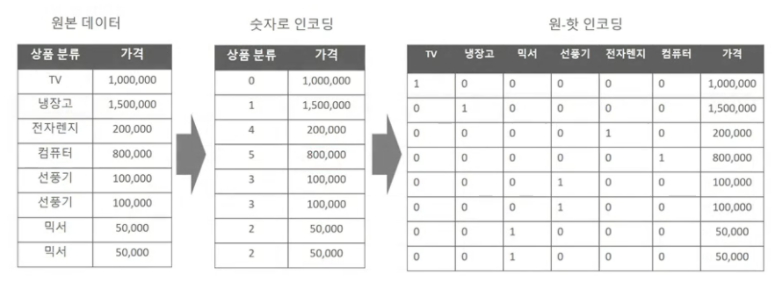

In [ ]:
from IPython.display import Image 
Image("one-hot encoding.png")

행 형태의 피처의 고유의 값을 열 형태로 차원 변환 후, 고유값에 해당하는 칼럼에만 1표시, 나머지 칼럼에는 0 표시

주의사항 1.모든 문자열 값이 숫자형 값으로 변환되야 함. 2.입력값으로 2차원 데이터가 필요함

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1) ## 한개의 열로 변환

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

**get_dummies()** 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환 가능

In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

### 피처 스케일링과 정규화

서로 다른 변수 값의 볌위를 일정 수준으로 맞추는 작업  
대표적으로 표준화(Standardization), 정규화(Normalization)이 있음  
- 표준화: 평균 0 분산 1인 가우시안 정규 분포를 가진 값으로 변환  
- 정규화: 서로 다른 피처의 크기를 통일하기 위해 크기를 변주화, 최소0~최대1의 값으로 변환  
  
사이킷런의 Normalization 모듈과 일반 정규화는 약간의 차이가 있음 
- 사이킷런의 Normalization 모듈은 선형대수에서의 정규화 개념 적용됨  - "벡터 정규화"로 지칭

일반적 의미의 표준화, 정규화를 '피처 스케일링'으로 통칭

### StandardScaler

표준화 지원, 평균 0, 분산 1 - 가우시안 평균 분포를 가질 수 있도록 변환 하는 것 매우 중요  
- 서포트 벡터 머신(Support Vector Machine), 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression): **가우시안 분포 가정으로 구현**

![guassian distribution](guassian distribution.png)

붓꽃 데이터 피처들 평균,분산값 구하기

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

표준화 진행

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())


### MinMaxScaler

데이터 값을 0과 1사이 범위값으로 변환(음수값이 있으면 -1에서 1값으로 변환)  
데이터 분포가 가우시안 분포가 아닐 경우 적용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

### 학습 데이터와 테스트 데이터 스케일링 변환 시 유의점

#### 학습데이터로 fit() 적용된 스케일링 기준 정보를 그대로~ 테스트데이터에 적용해야 함, 테스트데이터에 fit()를 다시 수행하면 안됨  
학습데이터와 테스트데이터의 스케일링 기준정보가 서로 달라지면 올바른 예측이 안됨

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [ ]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()
# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', train_array.reshape(-1))
print('Scale된 train_array 데이터:', train_scaled.reshape(-1))

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

In [ ]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

#### 1.가능하면 전체 데이터의 스케일링 변환 후 학습, 테스트 데이터 분리
#### 2.1이 여의치 않으면 테스트 데이터 변환 시 fit(), fit_transform()을 적용하지 않고 학습데이터로 이미 fit()된 Scaler객체 이용해 transform() 으로 변환
PCA와 같은 차원 축소 변환, 텍스트의 피처 벡터화 변환 작업시에도 동일하게 적용

-------------------

## 06 사이킷런으로 수행하는 타이타닉 생존자 예측

- PassengerId: 탑승자 데이터 일련번호  
- Survived: 생존여부, 0 = 사망, 1 = 생존  
- Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석  
- Sex: 탑승자 성별 
- Name: 탑승자 이름 
- Age: 탑승자 나이  
- SibSp: 같이 탑승한 형제, 자매 또는 배우자 인원 수  
- Parch: 같이 탑승한 부모님 또는 자녀 인원 수  
- Ticket: 티켓 번호  
- Fare: 요금  
- Cabin: 선실 번호  
- Embarked: 탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #대표적 시각화 패키지
import seaborn as sns #대표적 시각화 패키지
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

In [ ]:
print('\n ### 학습 데이터 정보 ###  \n')
titanic_df.info()

Null 값 처리 결정 필요

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace =True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [ ]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

In [ ]:
#Cabin값 앞1글자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

In [ ]:
# 성별에 따른 생존자수
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

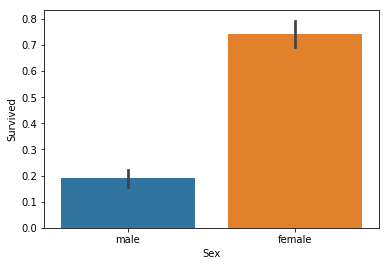

In [ ]:
#seaborn 패키지로 시각화
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

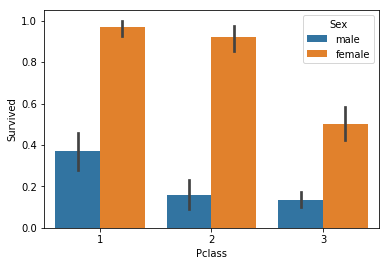

In [ ]:
# 객실 등급별, 성별 생존율
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

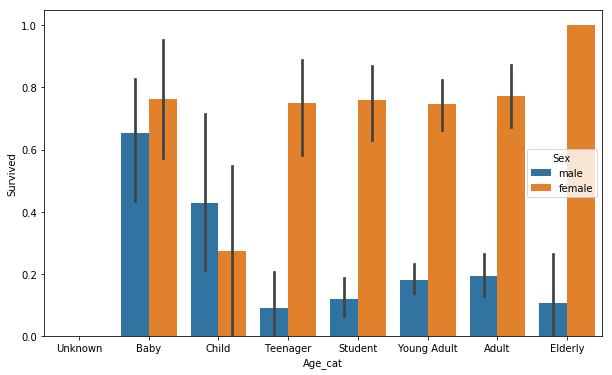

In [ ]:
# 연령대 별, 성 별 생존율

# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [ ]:
# LabelEncoder 사용하여 문자열 카테고리를 숫자형으로 변환
# encode_features()함수를 생성해 변환

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
#titanic_df.head()

In [ ]:
# 데이터 가공 내역 정리, 함수로 만들어 쉽게 재사용

# 데이터 전처리를 전체적으로 호출하는 함수 transform_featurs(): null처리, 포매팅, 인코딩 수행 내부 함수로 구성

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [ ]:
# 테스트 데이터 세트 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=11)

In [ ]:
# 결정 트리, 랜덤 포레스트, 로지스틱 회귀이용해 생존자 예측

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8324
LogisticRegression 정확도: 0.8659


In [ ]:
# KFold 클래스로 교차검증, 폴드 갯수 5

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [ ]:
# cross_val_score 로 교차검증 - StratifiedKFold로 분할

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


In [ ]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


0.7835 vs 0.8715  
하이퍼 파라미터 적용하여 예측 정확도 향상됨  
일반적으로 이정도 수준으로 증가하기 어려움  
테스트용 데이터 세트가 작기 떄문에 많이 증가한 것으로 보임